# Download insertion ap/ml/dv coordinates and PIDs
The data for this analysis was pulled from the electrophysiology atlas tables. Details can be found here:
https://docs.google.com/document/d/1_B-h9YHKmM5ggd5pA_qhWr8MQdgnX2PuZyidDdvauZk/edit

## Download pqt tables locally

Downloading: C:\Users\Dan\Downloads\ONE\alyx.internationalbrainlab.org\tmpufqrvkfv\cache.zip Bytes: 84038324


100%|████████████████████████████████████████████████████| 80.14519119262695/80.14519119262695 [00:06<00:00, 13.15it/s]
ephys_atlas\tables\channels.pqt: 100%|████████████████████████████████████████████| 1.91M/1.91M [00:00<00:00, 2.49MB/s]
ephys_atlas\tables\clusters.pqt: 100%|████████████████████████████████████████████| 32.4M/32.4M [00:10<00:00, 3.04MB/s]
ephys_atlas\tables\depths.pqt: 100%|██████████████████████████████████████████████| 3.27M/3.27M [00:01<00:00, 2.73MB/s]
ephys_atlas\tables\probes.pqt: 100%|███████████████████████████████████████████████| 41.4k/41.4k [00:00<00:00, 208kB/s]
ephys_atlas\tables\raw_ephys_features.pqt: 100%|██████████████████████████████████| 23.9M/23.9M [00:02<00:00, 9.24MB/s]
ephys_atlas\tables\xyz_picks.pqt: 100%|██████████████████████████████████████████████| 311k/311k [00:00<00:00, 872kB/s]


<AxesSubplot:xlabel='label', ylabel='count'>

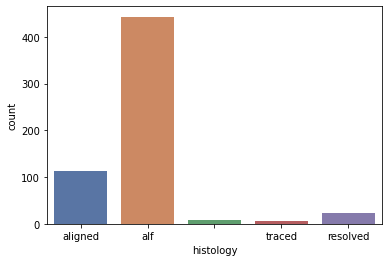

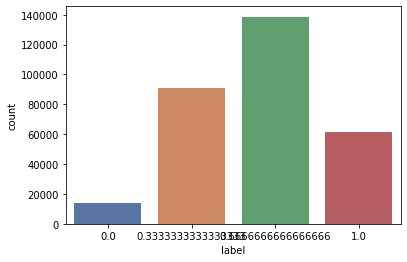

In [1]:
import pandas as pd

from pathlib import Path
from one.remote import aws
from one.api import ONE

LOCAL_DATA_PATH = Path("./ephys_atlas/tables/")

# The AWS private credentials are stored in Alyx, so that only one authentication is required
one = ONE(base_url="https://alyx.internationalbrainlab.org", mode='online')
s3, bucket_name = aws.get_s3_from_alyx(alyx=one.alyx)
aws.s3_download_folder("aggregates/bwm",
                       LOCAL_DATA_PATH,
                       s3=s3, bucket_name=bucket_name)

df_clusters = pd.read_parquet(LOCAL_DATA_PATH.joinpath('clusters.pqt'))
df_probes = pd.read_parquet(LOCAL_DATA_PATH.joinpath('probes.pqt'))
df_channels = pd.read_parquet(LOCAL_DATA_PATH.joinpath('channels.pqt'))
df_depths = pd.read_parquet(LOCAL_DATA_PATH.joinpath('depths.pqt'))
df_voltage = pd.read_parquet(LOCAL_DATA_PATH.joinpath('raw_ephys_features.pqt'))

## %%
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(data=df_probes, x='histology', palette='deep')

plt.figure()
sns.countplot(data=df_clusters, x='label',  palette='deep')

## Convert clusters table to CSV, drop columns, and add ml/ap/dv coordinates

In [2]:
clusters = pd.read_parquet('./ephys_atlas/tables/clusters.pqt')
channels = pd.read_parquet('./ephys_atlas/tables/channels.pqt')

In [4]:
import ibllib.atlas as atlas
CCFAtlas = atlas.AllenAtlas(25)

In [8]:
# convert xyz to ml/ap/dv coordinates
xyz = clusters[['x','y','z']].values

In [11]:
mlapdv = CCFAtlas.xyz2ccf(xyz)

In [12]:
clusters['ml'] = mlapdv[:,0]
clusters['ap'] = mlapdv[:,1]
clusters['dv'] = mlapdv[:,2]

In [ ]:
clusters.to_csv('./clusters.csv'